# Figures and analysis

This notebook contains scripts to reproduce the figures and analytical results of the manuscript. Full details of the plotting functions are typically contained in `figures.py`. Figures are saved in PDF format in the `figures/` folder.


# Contents
* [Libraries](#package)
* [Figures and data analysis](#figure)
    * [Figure 1. popDMS overview and performance comparison](#overview)
    * [Figure 2. Consistency of popDMS and prior methods, and epistasis](#epistasis)
    * [Figure S1. Robustness to finite sampling in simulations](#sampling)
    * [Figure S2. Comparison of inferences at single sites](#site)
    * [Analysis. Comparison of inferred mutation effects and natural frequencies](#natural)

## Libraries<a class = "anchor" id = "package"></a>

In [1]:
# Full library list and version numbers

print('Figures below were produced using the following packages:')

import os
import sys
print('python ==', sys.version)

import numpy as np
print('numpy ==', np.__version__)

import scipy as sp
import scipy.stats as st
print('scipy ==', sp.__version__)

import pandas as pd
print('pandas ==', pd.__version__)

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib ==', matplotlib.__version__)

import seaborn as sns 
print('seaborn ==', sns.__version__)

import logomaker as lm

import warnings

import figures as figs
import popDMS as pop

from importlib import reload

Figures below were produced using the following packages:
python == 3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:35:25) [Clang 16.0.6 ]
numpy == 1.26.3
scipy == 1.12.0
pandas == 2.2.0
matplotlib == 3.8.2
seaborn == 0.13.1


## Figures and data analysis <a class = "anchor" id = "figure"></a>

### Figure 1. Overview and performance comparison <a class = "anchor" id = "overview"></a>

protein			R (pop)	R (alt)	R (between, Pearson/Spearman)
Flu_WSN			0.91	0.58	0.83	0.66
Flu_A549		0.97	0.74	0.83	0.72
Flu_CCL141		0.97	0.74	0.82	0.74
Flu_Aichi68C		0.94	0.74	0.80	0.59
Flu_PR8			0.79	0.59	0.87	0.65
Flu_MatrixM1		0.87	0.48	0.83	0.54
ZIKV			0.85	0.68	0.92	0.76
Perth2009		0.96	0.73	0.89	0.79
Flu_MS			0.92	0.76	0.81	0.65
Flu_MxAneg		0.92	0.80	0.87	0.74
HIV_BG505		0.96	0.80	0.82	0.82
HIV_BF520		0.92	0.69	0.75	0.74
HIV_CD4_human		0.95	0.75	0.80	0.79
HIV_CD4_rhesus		0.91	0.50	0.67	0.74
HIV_bnAbs_FP16		0.91	0.58	0.78	0.79
HIV_bnAbs_FP20		0.91	0.56	0.77	0.78
HIV_bnAbs_VRC34		0.92	0.56	0.77	0.78
HDR_Y2H_1		0.97	0.94	0.31	0.68
HDR_Y2H_2		0.97	0.86	0.29	0.65
HDR_E3			0.88	0.82	0.56	0.70
WWdomain_YAP1		0.99	0.97	0.54	0.62
Ubiq_Ube4b		0.99	0.87	0.65	0.70
HDR_DBR1		0.88	0.63	0.37	0.61
Thrombo_TpoR_1		0.98	0.45	0.50	0.42
Thrombo_TpoR_2		0.90	0.41	0.57	0.57
average			0.92	0.69	0.70	0.69

R^2 increase of >0.5 in 6 out of 25 data sets
Mean (median) R^2 gain: 0.36 (0.37)


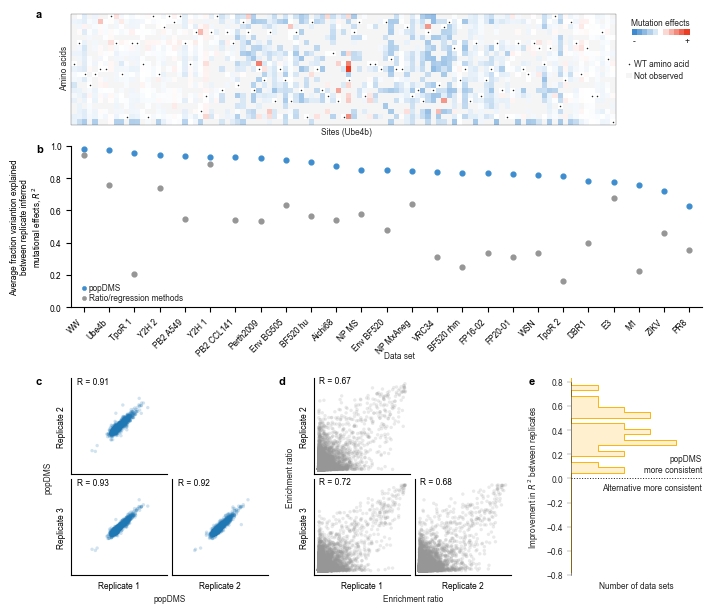

In [2]:
reload(figs)
figs.fig_methods_comparison()
plt.show()

### Figure 2. Consistency of popDMS and prior methods, and epistasis <a class = "anchor" id = "epistasis"></a>

epistasis correlations between popDMS and regression
Pearson 	0.73,	p=0.00e+00
Spearman	0.75,	p=0.00e+00


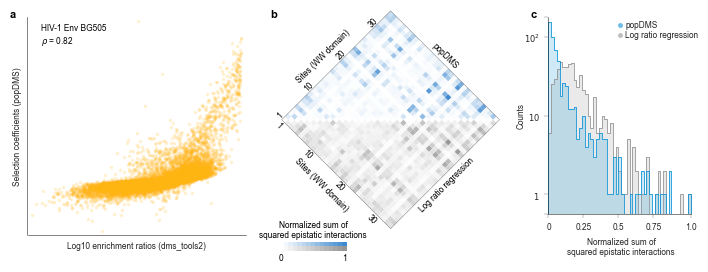

In [3]:
reload(figs)
figs.fig_comp_epistasis()
plt.show()

### Figure S1. Robustness to finite sampling in simulations <a class = "anchor" id = "sampling"></a>

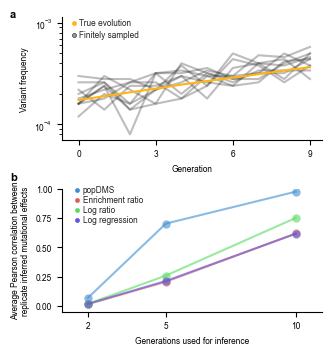

In [4]:
reload(figs)
figs.fig_finite_sampling()
plt.show()

### Figure S2. Comparison of inferences at single sites <a class = "anchor" id = "site"></a>

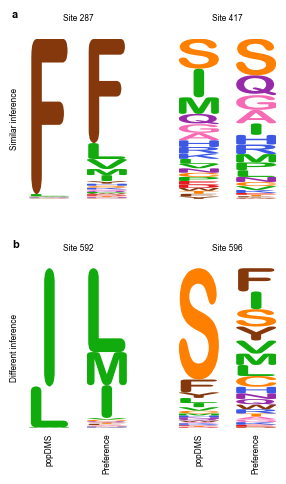

In [5]:
reload(figs)
figs.fig_site_spectrum()
plt.show()

### Analysis. Comparison of inferred mutant effects and natural frequencies <a class = "anchor" id = "natural"></a>

In [6]:
df_freq  = pd.read_csv('./data/raw_data/H1_HumanSwine_alignment_frequency_mod.txt', sep="\t")
df_freq  = df_freq.drop(['WT_AA'], axis=1)
df_sele  = pd.read_csv('./output/selection_coefficients/WSN_selection_coefficients.csv.gz')
df_pref1 = pd.read_csv('./data/prefs/WSN-1_prefs.txt', sep="\t")
df_pref1 = df_pref1.drop(['WT_AA', 'PI_*'], axis = 1)
df_pref2 = pd.read_csv('./data/prefs/WSN-2_prefs.txt', sep="\t")
df_pref2 = df_pref2.drop(['WT_AA', 'PI_*'], axis = 1)
df_pref3 = pd.read_csv('./data/prefs/WSN-3_prefs.txt', sep="\t")
df_pref3 = df_pref3.drop(['WT_AA', 'PI_*'], axis = 1)
df_pref  = pd.concat([df_pref1, df_pref2, df_pref3]).groupby(level=0).mean()

sites = np.array(df_freq['SITE'])
ranks_pref = []
z_pref     = []
ranks_sele = []
z_sele     = []

aas = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
rank_min = 0

for s in sites:
    if s==1:
        continue
    
    df_f_site = df_freq[df_freq['SITE']==s]
    f_site = [df_f_site[aa] for aa in aas]
    top = np.argmax(f_site)
    
    df_p_site  = df_pref[df_pref['#SITE']==s]
    pref_site  = [df_p_site['PI_%s' % aa] for aa in aas]
    site_ranks = st.rankdata(pref_site) 
    ranks_pref.append(len(aas)+1 - site_ranks[top])

    if s==2:
        rank_min = len(aas)+1 - np.max(site_ranks)
    
    m_site   = np.mean(pref_site)
    std_site = np.std(pref_site)
    z_pref.append((pref_site[top]-m_site)/std_site)
    
    df_s_site  = df_sele[df_sele['site']==s]
    sele_site  = [df_s_site[df_s_site['amino_acid']==aa]['joint'] for aa in aas]
    site_ranks = st.rankdata(sele_site)
    ranks_sele.append(len(aas)+1 - site_ranks[top])
    
    m_site   = np.mean(sele_site)
    std_site = np.std(sele_site)
    z_sele.append((sele_site[top]-m_site)/std_site)

print('rank of WT AA (min %d, smaller is better)' % rank_min)
print('method\tmean\tmedian\tstd')
print('pref\t%.1f\t%.1f\t%.1f' % (np.mean(ranks_pref), np.median(ranks_pref), np.std(ranks_pref)))
print('s\t%.1f\t%.1f\t%.1f\n'  % (np.mean(ranks_sele), np.median(ranks_sele), np.std(ranks_sele)))

print('z score of WT AA (larger is better)')
print('method\tmean\tstd')
print('pref\t%.1f\t%.1f' % (np.mean(z_pref), np.std(z_pref)))
print('s\t%.1f\t%.1f\n'  % (np.mean(z_sele), np.std(z_sele)))

rank of WT AA (min 1, smaller is better)
method	mean	median	std
pref	2.7	1.0	3.2
s	2.1	1.0	3.7

z score of WT AA (larger is better)
method	mean	std
pref	2.6	1.5
s	3.5	1.5

